In [ ]:
!pip install scikit-surprise

ERROR: Operation cancelled by user


In [ ]:
# Розробляємо за допомогою бібліотеки surprise рекомендаційну систему.
#Використовуємо датасет movielens-100k.
from surprise import Dataset, Reader,SVD,SVDpp,NMF,SlopeOne,KNNBasic
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
df = Dataset.load_builtin('ml-100k')


In [ ]:
# Використовуємо алгоритми SVD, SVDpp, NMF + ще два на власний вибір.
#Найкращі параметри для всіх алгоритмів підбираємо за допомогою крос-валідації.
algo_svd = SVD()
algo_svdpp = SVDpp()
algo_NMF = NMF()
algo_slop = SlopeOne()
algo_KNN = KNNBasic()

In [ ]:
# Крос-валідація використовується для оцінки того, наскільки добре ці алгоритми працюють на вашому датасеті.
crossval_svd = cross_validate(algo_svd,df,measures=['RMSE'], cv = 3, verbose=True)
crossval_svdpp = cross_validate(algo_svdpp,df,measures=['RMSE'], cv = 3, verbose=True)
crossval_NMF = cross_validate(algo_NMF,df,measures=['RMSE'], cv = 3, verbose=True)
crossval_slop = cross_validate(algo_slop,df,measures=['RMSE'], cv = 3, verbose=True)
crossval_KNN = cross_validate(algo_KNN,df,measures=['RMSE'], cv = 3, verbose=True)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9458  0.9434  0.9456  0.9449  0.0011  
Fit time          2.24    0.93    0.88    1.35    0.63    
Test time         0.31    0.21    0.29    0.27    0.04    
Evaluating RMSE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9300  0.9237  0.9296  0.9277  0.0029  
Fit time          17.89   17.93   18.14   17.99   0.11    
Test time         6.79    6.59    6.83    6.74    0.11    
Evaluating RMSE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9757  0.9776  0.9786  0.9773  0.0012  
Fit time          1.12    1.11    1.14    1.12    0.01    
Test time         0.22    0.29    0.19    0.23    0.04    
Evaluating RMSE of algorithm SlopeOne on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9540  0.94

In [ ]:
# Обчислюємо середнє значення середньоквадратичної помилки RMSE для кожного алгоритму на основі результатів крос-валідації
rmse_svd = crossval_svd['test_rmse'].mean()
rmse_svdpp = crossval_svdpp['test_rmse'].mean()
rmse_NMF = crossval_NMF['test_rmse'].mean()
rmse_slop = crossval_slop['test_rmse'].mean()
rmse_KNN = crossval_KNN['test_rmse'].mean()

print(f"svd mean:{rmse_svd}")
print(f"svdpp mean:{rmse_svdpp}")
print(f"nmf mean:{rmse_NMF}")
print(f"slope mean:{rmse_slop}")
print(f"knn mean:{rmse_KNN}")

svd mean:0.9449259658259299
svdpp mean:0.9277405814801257
nmf mean:0.9772831917080042
slope mean:0.9503073814436975
knn mean:0.987767756587505


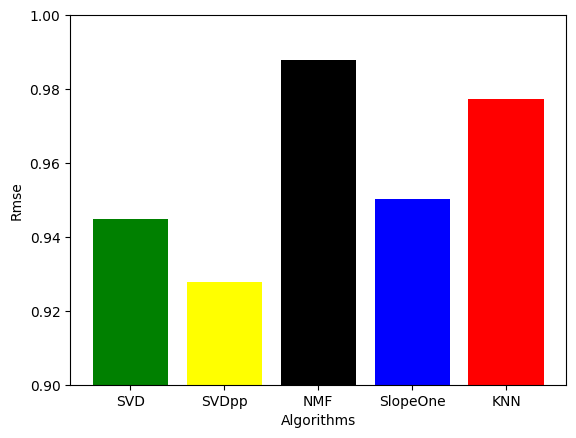

In [ ]:
# Візуалізуємо наші дані

rmse_vals = [rmse_svd,rmse_svdpp,rmse_KNN,rmse_slop,rmse_NMF]
algorithms = ['SVD','SVDpp','NMF','SlopeOne','KNN']

plt.bar(algorithms,rmse_vals,color=['green','yellow','black','blue','red'])
plt.xlabel('Algorithms')
plt.ylabel('Rmse')
plt.ylim(0.9,1.0)
plt.show()

In [ ]:
# Працюємо з алгоритмом SCDpp,також проводимо поділ набору даних.
from surprise import accuracy
from sklearn.metrics import mean_absolute_error
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=.25)
algo_svdpp.fit(trainset)
predictions = algo_svdpp.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9190


0.9189707976028334

In [ ]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(df)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9632151044287296
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [ ]:
# Імпортуємо токен з сайту
!pip install sigopt
from sigopt import Connection
conn = Connection(client_token="FQAJHXQJZHLSLFODVJXEHAHFYLGPSNBDSEPXNPAULUGNECQE")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [ ]:
# Тепер визначаємо параметри
experiment = conn.experiments().create(

  name='Surprise Movies-100k Recommender41',
  parameters=[
    dict(name='n_epochs', type='int', bounds=dict(min=5, max=10)),
    dict(name='lr_all', type='double', bounds=dict(min=0.002, max=0.005)),
    dict(name='reg_all', type='double', bounds=dict(min=0.4, max=0.6))
  ],

  metrics=[
    dict(name='RMSE', objective='minimize', strategy='optimize'),
    dict(name='MAE', objective='minimize', strategy='store')
  ],

  parallel_bandwidth=1,
  observation_budget=50,

)

print("Created experiment: https://app.sigopt.com/experiment/" + experiment.id)

Created experiment: https://app.sigopt.com/experiment/1023738


In [ ]:
# Визначаємо функції, які необхідні для створення моделі
def create_model(assignments):
  algor = SVDpp(
      n_epochs=assignments['n_epochs'],
      lr_all=assignments['lr_all'],
      reg_all=assignments['reg_all']

  ).fit(trainset)

  return algor

def evaluate_model(assignments):
  algor = create_model(assignments)
  predictions = algor.test(testset)

  return [
      dict(name="RMSE", value=accuracy.rmse(predictions)),
      dict(name="MAE", value=accuracy.mae(predictions))
    ]

In [ ]:
# Цикл оптимізації
while experiment.progress.observation_count < experiment.observation_budget:

  suggestion = conn.experiments(experiment.id).suggestions().create()
  value_dicts = evaluate_model(suggestion.assignments)
  conn.experiments(experiment.id).observations().create(
    suggestion=suggestion.id,
    values=value_dicts,
  )

  experiment = conn.experiments(experiment.id).fetch()

# Fetch the best configuration and explore your experiment
all_best_assignments = conn.experiments(experiment.id).best_assignments().fetch()

# Returns a list of dict-like Observation objects
best_assignments = all_best_assignments.data[0].assignments

print("Best Assignments: " + str(best_assignments))
print("Explore your experiment: https://app.sigopt.com/experiment/" + experiment.id + "/analysis")

RMSE: 0.9711
MAE:  0.7817
RMSE: 0.9804
MAE:  0.7901
RMSE: 0.9760
MAE:  0.7851
RMSE: 0.9729
MAE:  0.7840
RMSE: 0.9678
MAE:  0.7785
RMSE: 0.9672
MAE:  0.7783
RMSE: 0.9635
MAE:  0.7741
RMSE: 0.9613
MAE:  0.7717
RMSE: 0.9627
MAE:  0.7725
RMSE: 0.9583
MAE:  0.7683
RMSE: 0.9700
MAE:  0.7799
RMSE: 0.9757
MAE:  0.7853
RMSE: 0.9761
MAE:  0.7861
RMSE: 0.9655
MAE:  0.7752
RMSE: 0.9761
MAE:  0.7872
RMSE: 0.9704
MAE:  0.7804
RMSE: 0.9683
MAE:  0.7775
RMSE: 0.9671
MAE:  0.7765
RMSE: 0.9594
MAE:  0.7696
RMSE: 0.9626
MAE:  0.7728
RMSE: 0.9708
MAE:  0.7817
RMSE: 0.9758
MAE:  0.7857
RMSE: 0.9679
MAE:  0.7781
RMSE: 0.9870
MAE:  0.7973
RMSE: 0.9692
MAE:  0.7808
RMSE: 0.9732
MAE:  0.7839
RMSE: 0.9681
MAE:  0.7781
RMSE: 0.9841
MAE:  0.7949
RMSE: 0.9748
MAE:  0.7847
RMSE: 0.9819
MAE:  0.7927
RMSE: 0.9695
MAE:  0.7805
RMSE: 0.9733
MAE:  0.7845
RMSE: 0.9726
MAE:  0.7838
RMSE: 0.9623
MAE:  0.7722
RMSE: 0.9646
MAE:  0.7744
RMSE: 0.9670
MAE:  0.7767
RMSE: 0.9662
MAE:  0.7756
RMSE: 0.9624
MAE:  0.7720
RMSE: 0.9841

/usr/local/lib/python3.10/dist-packages/sigopt/objects.py:338: RuntimeWarning: The .data field only contains a single page of results, which may be incomplete for large responses. Prefer to use the `.iterate_pages() to ensure that you iterate through all elements in the response.
  warnings.warn(
